# Случайные процессы

## Генератор случайных чисел

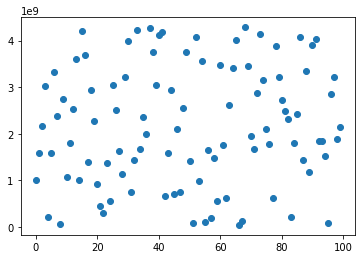

In [2]:
from pylab import plot,show

N = 100
a = 1664525
c = 1013904223
m = 4294967296
x = 1
results = []

for i in range(N):
    x = (a*x+c)%m
    results.append(x)
plot(results,"o")
show()

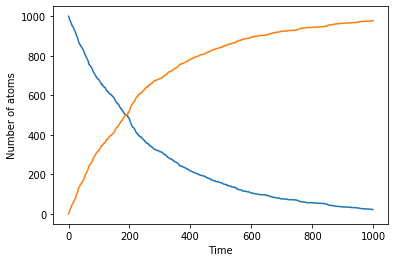

In [3]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

# Make the graph
plot(tpoints,Tlpoints)
plot(tpoints,Pbpoints)
xlabel("Time")
ylabel("Number of atoms")
show()

In [4]:
from math import sqrt,log,cos,sin,pi
from random import random

# Constants
Z = 79
e = 1.602e-19
E = 7.7e6*e
epsilon0 = 8.854e-12
a0 = 5.292e-11
sigma = a0/100
N = 1000000

# Function to generate two Gaussian random numbers
def gaussian():
    r = sqrt(-2*sigma*sigma*log(1-random()))
    theta = 2*pi*random()
    x = r*cos(theta)
    y = r*sin(theta)
    return x,y

# Main program
count = 0
for i in range(N):
    x,y = gaussian()
    b = sqrt(x*x+y*y)
    if b<Z*e*e/(2*pi*epsilon0*E):
        count += 1

print(count,"particles were reflected out of",N)

1535 particles were reflected out of 1000000


## Метод Монте-Карло

In [5]:
from math import sin
from random import random

def f(x):
    return (sin(1/(x*(2-x))))**2

N = 10000
count = 0
for i in range(N):
    x = 2*random()
    y = random()
    if y<f(x):
        count += 1
I = 2*count/N
print(I)

1.4426


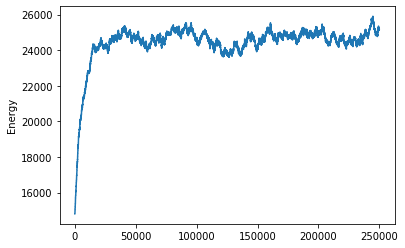

In [6]:
from random import random,randrange
from math import exp,pi
from numpy import ones
from pylab import plot,ylabel,show

T = 10.0
N = 1000
steps = 250000

# Create a 2D array to store the quantum numbers
n = ones([N,3],int)

# Main loop
eplot = []
E = 3*N*pi*pi/2
for k in range(steps):

    # Choose the particle and the move
    i = randrange(N)
    j = randrange(3)
    if random()<0.5:
        dn = 1
        dE = (2*n[i,j]+1)*pi*pi/2
    else:
        dn = -1
        dE = (-2*n[i,j]+1)*pi*pi/2

    # Decide whether to accept the move
    if n[i,j]>1 or dn==1:
        if random()<exp(-dE/T):
            n[i,j] += dn
            E += dE

    eplot.append(E)

# Make the graph
plot(eplot)
ylabel("Energy")
show()

In [7]:
from math import sqrt,exp
from numpy import empty
from random import random,randrange
from visual import sphere,curve,display,rate

N = 25
R = 0.02
Tmax = 10.0
Tmin = 1e-3
tau = 1e4

# Function to calculate the magnitude of a vector
def mag(x):
    return sqrt(x[0]**2+x[1]**2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

# Choose N city locations and calculate the initial distance
r = empty([N+1,2],float)
for i in range(N):
    r[i,0] = random()
    r[i,1] = random()
r[N] = r[0]
D = distance()

# Set up the graphics
display(center=[0.5,0.5])
for i in range(N):
    sphere(pos=r[i],radius=R)
l = curve(pos=r,radius=R/2)

# Main loop
t = 0
T = Tmax
while T>Tmin:

    # Cooling
    t += 1
    T = Tmax*exp(-t/tau)

    # Update the visualization every 100 moves
    if t%100==0:
        l.pos = r
        rate(25)

    # Choose two cities to swap and make sure they are distinct
    i,j = randrange(1,N),randrange(1,N)
    while i==j:
        i,j = randrange(1,N),randrange(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    r[i,0],r[j,0] = r[j,0],r[i,0]
    r[i,1],r[j,1] = r[j,1],r[i,1]
    D = distance()
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if random()>exp(-deltaD/T):
        r[i,0],r[j,0] = r[j,0],r[i,0]
        r[i,1],r[j,1] = r[j,1],r[i,1]
        D = oldD

ModuleNotFoundError: No module named 'visual'